<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Apr  2 15:41:31 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 572.83                 Driver Version: 572.83         CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3080 ...  WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A   51C    P0             26W /  110W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.6.0+cu126


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory exists.")
else: 
    print(f"Did not find {image_path} directory, creating...")
    image_path.mkdir(parents=True, exist_ok=True)

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    requests = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak, sushi data...")
    f.write(requests.content)

with zipfile.ZipFile(data_path/"pizza_steak_sushi.zip", "r") as zip_ref:
    print(f"Unzipping pizza, steak, suhsi data to {image_path}")
    zip_ref.extractall(image_path) 

data\pizza_steak_sushi directory exists.
Unzipping pizza, steak, suhsi data to data\pizza_steak_sushi


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

data\pizza_steak_sushi\train\steak\2254705.jpg
steak
Random image path: data\pizza_steak_sushi\train\steak\2254705.jpg
Image class: steak
Image height: 512
Image width: 512


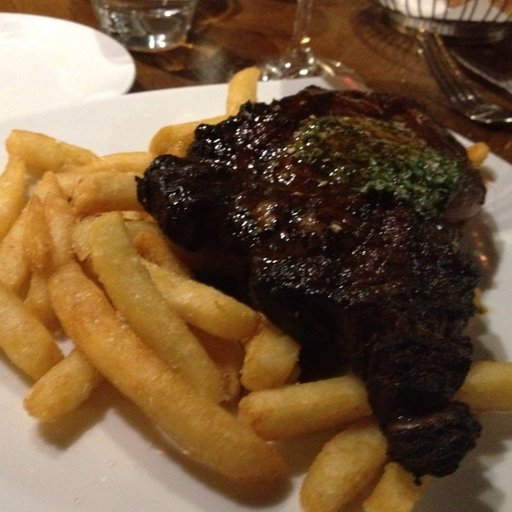

In [6]:
# Visualize an image
import random
from PIL import Image

image_path_list = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_path_list)
print(random_image_path)

image_class = random_image_path.parent.stem
print(image_class)

img = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

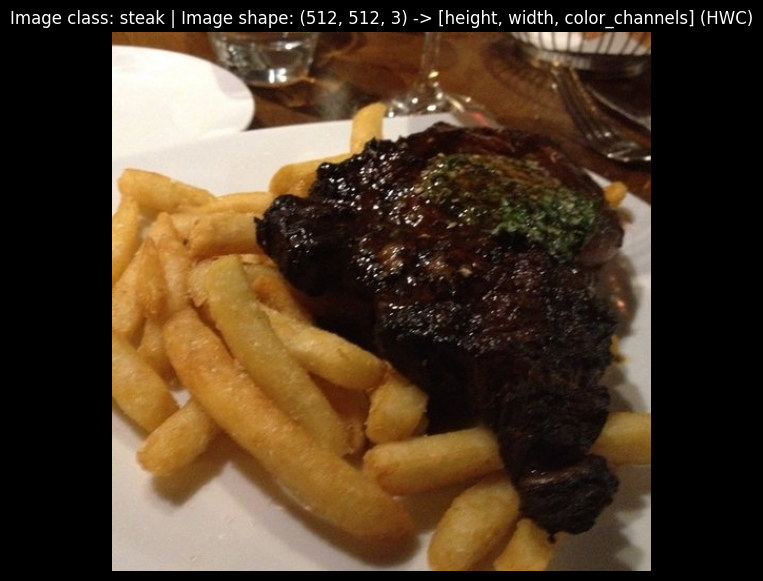

In [7]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(img)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {image_class} | Image shape: {image_as_array.shape} -> [height, width, color_channels] (HWC)")
plt.axis(False)

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [8]:
# 3.1 Transforming data with torchvision.transforms
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


In [9]:
# Write transform for turning images into tensors
data_transforms = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

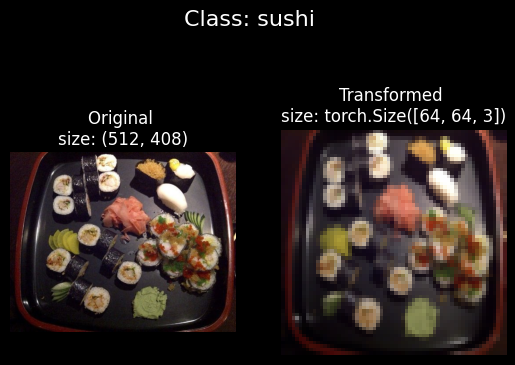

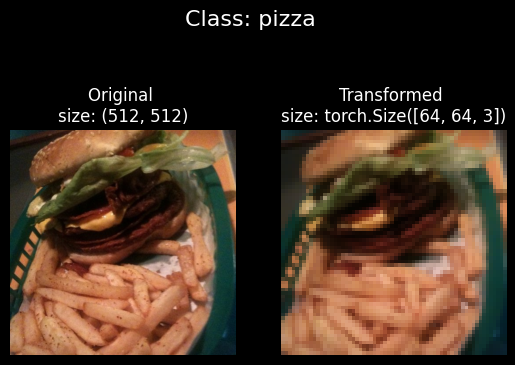

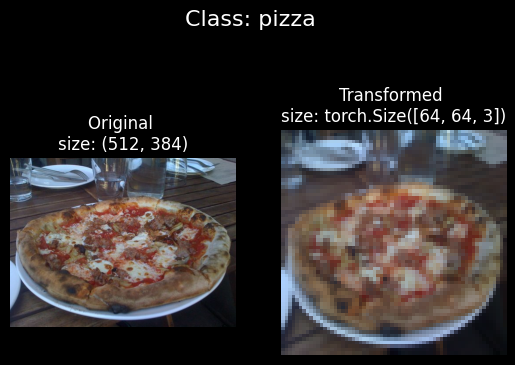

In [10]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed = 42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nsize: {f.size}")
            ax[0].axis("off")
            
            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nsize: {transformed_image.shape}")
            ax[1].axis("off")
            
            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_paths=image_path_list,
                        transform=data_transforms,
                        n=3)


### Load image data using `ImageFolder`

In [11]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transforms,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transforms,
                                 target_transform=None)

In [12]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [13]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [14]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [15]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 1

train_dataloader = DataLoader(dataset=train_data,
                              batch_size= BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

In [16]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(225, 75)

In [17]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, try changing the batch_size parameter above and see what happens
print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [45]:
import torch
from torch import nn

class TinyVGG(nn.Module):
    
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
        )
    
    def forward(self, x):
        # x = self.conv_block_1(x)
        # print(f"Layer 1 shape: {x.shape}")
        # x = self.conv_block_2(x)
        # print(f"Layer 2 shape: {x.shape}")
        # x = self.classifier(x)
        # print(f"Layer 3 shape: {x.shape}")
        # return x
        return self.classifier(self.conv_block_2(self.conv_block_1(x)))

In [46]:
model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [47]:
from torchinfo import summary

summary(model_0, input_size=[1, 3, 64, 64])

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGG                                  [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─MaxPool2d: 2-4                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-5                       [1, 10, 32, 32]           910
│    └─ReLU: 2-6                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-7                       [1, 10, 32, 32]           910
│    └─MaxPool2d: 2-8                    [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 3]                    --
│    └─Flatten: 2-9                      [1, 2560]                 --
│    └─Line

## 4. Create training and testing functions for `model_0`.

In [48]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for X, y in dataloader:
 
    # Send data to target device
    X, y = X.to(device), y.to(device)

    # 1. Forward pass
    y_pred = model(X)
    
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss = train_loss + loss

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=-1), dim=-1)
    train_acc = train_acc + ((y_pred_class == y).sum().item() / len(y_pred))
   
  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc
  

In [49]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
  
    # Loop through DataLoader batches
    for X, y in dataloader:
    
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss
      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=-1), dim=-1)
      test_acc = test_acc + ((y_pred_class == y).sum().item() / len(y_pred))
    
  # Adjust metrics to get average loss and accuracy per batch
  test_acc = test_acc / len(dataloader)
  test_loss = test_loss / len(dataloader)

  return test_loss, test_acc


In [50]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [51]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), 
                             lr=0.001)

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=5)

 20%|██        | 1/5 [00:02<00:09,  2.34s/it]

Epoch: 1 | train_loss: 1.1335 | train_acc: 0.3867 | test_loss: 1.9868 | test_acc: 0.4667


 40%|████      | 2/5 [00:04<00:06,  2.25s/it]

Epoch: 2 | train_loss: 1.0119 | train_acc: 0.4933 | test_loss: 0.9776 | test_acc: 0.4933


 60%|██████    | 3/5 [00:06<00:04,  2.23s/it]

Epoch: 3 | train_loss: 0.9513 | train_acc: 0.5867 | test_loss: 1.0047 | test_acc: 0.4667


 80%|████████  | 4/5 [00:08<00:02,  2.04s/it]

Epoch: 4 | train_loss: 0.8642 | train_acc: 0.6133 | test_loss: 1.1625 | test_acc: 0.4400


100%|██████████| 5/5 [00:10<00:00,  2.05s/it]

Epoch: 5 | train_loss: 0.7988 | train_acc: 0.6533 | test_loss: 0.9373 | test_acc: 0.5200


In [53]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

  5%|▌         | 1/20 [00:01<00:37,  1.95s/it]

Epoch: 1 | train_loss: 1.1335 | train_acc: 0.3867 | test_loss: 1.9926 | test_acc: 0.4667


 10%|█         | 2/20 [00:03<00:34,  1.91s/it]

Epoch: 2 | train_loss: 1.0045 | train_acc: 0.5111 | test_loss: 0.9756 | test_acc: 0.4800


 15%|█▌        | 3/20 [00:05<00:32,  1.90s/it]

Epoch: 3 | train_loss: 0.9528 | train_acc: 0.6000 | test_loss: 1.0051 | test_acc: 0.4400


 20%|██        | 4/20 [00:07<00:30,  1.89s/it]

Epoch: 4 | train_loss: 0.8648 | train_acc: 0.5911 | test_loss: 1.0756 | test_acc: 0.4400


 25%|██▌       | 5/20 [00:09<00:28,  1.89s/it]

Epoch: 5 | train_loss: 0.8114 | train_acc: 0.6489 | test_loss: 0.9446 | test_acc: 0.5200


 30%|███       | 6/20 [00:11<00:27,  1.95s/it]

Epoch: 6 | train_loss: 0.8399 | train_acc: 0.6578 | test_loss: 1.0015 | test_acc: 0.4933


 35%|███▌      | 7/20 [00:13<00:25,  1.99s/it]

Epoch: 7 | train_loss: 0.7006 | train_acc: 0.6711 | test_loss: 1.2213 | test_acc: 0.4933


 40%|████      | 8/20 [00:15<00:23,  2.00s/it]

Epoch: 8 | train_loss: 0.7869 | train_acc: 0.6844 | test_loss: 1.1756 | test_acc: 0.4667


 45%|████▌     | 9/20 [00:17<00:22,  2.01s/it]

Epoch: 9 | train_loss: 0.6899 | train_acc: 0.7156 | test_loss: 1.1849 | test_acc: 0.4133


 50%|█████     | 10/20 [00:19<00:20,  2.01s/it]

Epoch: 10 | train_loss: 0.6074 | train_acc: 0.7333 | test_loss: 1.4075 | test_acc: 0.4800


 55%|█████▌    | 11/20 [00:21<00:17,  1.93s/it]

Epoch: 11 | train_loss: 0.5248 | train_acc: 0.8044 | test_loss: 1.3803 | test_acc: 0.5200


 60%|██████    | 12/20 [00:23<00:15,  1.90s/it]

Epoch: 12 | train_loss: 0.4418 | train_acc: 0.8089 | test_loss: 1.6574 | test_acc: 0.4667


 65%|██████▌   | 13/20 [00:25<00:12,  1.86s/it]

Epoch: 13 | train_loss: 0.4203 | train_acc: 0.8444 | test_loss: 1.6970 | test_acc: 0.4400


 70%|███████   | 14/20 [00:26<00:11,  1.83s/it]

Epoch: 14 | train_loss: 0.2973 | train_acc: 0.8978 | test_loss: 2.5595 | test_acc: 0.3867


 75%|███████▌  | 15/20 [00:28<00:09,  1.87s/it]

Epoch: 15 | train_loss: 0.3467 | train_acc: 0.8711 | test_loss: 2.8301 | test_acc: 0.3467


 80%|████████  | 16/20 [00:30<00:07,  1.92s/it]

Epoch: 16 | train_loss: 0.2796 | train_acc: 0.8933 | test_loss: 2.7198 | test_acc: 0.3333


 85%|████████▌ | 17/20 [00:32<00:05,  1.96s/it]

Epoch: 17 | train_loss: 0.3176 | train_acc: 0.8800 | test_loss: 2.5344 | test_acc: 0.4400


 90%|█████████ | 18/20 [00:34<00:03,  1.93s/it]

Epoch: 18 | train_loss: 0.1880 | train_acc: 0.9289 | test_loss: 2.5148 | test_acc: 0.4267


 95%|█████████▌| 19/20 [00:36<00:01,  1.95s/it]

Epoch: 19 | train_loss: 0.1255 | train_acc: 0.9511 | test_loss: 3.0285 | test_acc: 0.4800


100%|██████████| 20/20 [00:38<00:00,  1.94s/it]

Epoch: 20 | train_loss: 0.1699 | train_acc: 0.9333 | test_loss: 3.1099 | test_acc: 0.4533


In [54]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), 
                             lr=0.001)

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=50)

  2%|▏         | 1/50 [00:02<01:41,  2.06s/it]

Epoch: 1 | train_loss: 1.1284 | train_acc: 0.3644 | test_loss: 1.6079 | test_acc: 0.3600


  4%|▍         | 2/50 [00:04<01:41,  2.11s/it]

Epoch: 2 | train_loss: 1.0315 | train_acc: 0.5111 | test_loss: 0.9578 | test_acc: 0.4533


  6%|▌         | 3/50 [00:06<01:39,  2.11s/it]

Epoch: 3 | train_loss: 0.9304 | train_acc: 0.6044 | test_loss: 0.9899 | test_acc: 0.4400


  8%|▊         | 4/50 [00:08<01:33,  2.03s/it]

Epoch: 4 | train_loss: 0.8583 | train_acc: 0.6044 | test_loss: 1.1676 | test_acc: 0.4400


 10%|█         | 5/50 [00:10<01:28,  1.97s/it]

Epoch: 5 | train_loss: 0.7994 | train_acc: 0.6444 | test_loss: 0.9310 | test_acc: 0.5333


 12%|█▏        | 6/50 [00:11<01:25,  1.95s/it]

Epoch: 6 | train_loss: 0.7835 | train_acc: 0.6711 | test_loss: 0.9794 | test_acc: 0.5733


 14%|█▍        | 7/50 [00:13<01:22,  1.91s/it]

Epoch: 7 | train_loss: 0.6719 | train_acc: 0.6933 | test_loss: 1.3055 | test_acc: 0.5733


 16%|█▌        | 8/50 [00:15<01:18,  1.88s/it]

Epoch: 8 | train_loss: 0.7221 | train_acc: 0.7067 | test_loss: 1.2310 | test_acc: 0.4133


 18%|█▊        | 9/50 [00:17<01:17,  1.88s/it]

Epoch: 9 | train_loss: 0.6376 | train_acc: 0.7333 | test_loss: 1.2497 | test_acc: 0.4933


 20%|██        | 10/50 [00:19<01:14,  1.86s/it]

Epoch: 10 | train_loss: 0.5611 | train_acc: 0.7600 | test_loss: 1.5047 | test_acc: 0.4000


 22%|██▏       | 11/50 [00:21<01:12,  1.86s/it]

Epoch: 11 | train_loss: 0.4751 | train_acc: 0.8267 | test_loss: 1.4540 | test_acc: 0.5867


 24%|██▍       | 12/50 [00:23<01:11,  1.87s/it]

Epoch: 12 | train_loss: 0.3652 | train_acc: 0.8444 | test_loss: 1.7315 | test_acc: 0.4933


 26%|██▌       | 13/50 [00:24<01:08,  1.86s/it]

Epoch: 13 | train_loss: 0.3531 | train_acc: 0.8444 | test_loss: 1.5133 | test_acc: 0.4533


 28%|██▊       | 14/50 [00:26<01:07,  1.87s/it]

Epoch: 14 | train_loss: 0.2973 | train_acc: 0.8889 | test_loss: 1.5994 | test_acc: 0.5467


 30%|███       | 15/50 [00:28<01:04,  1.84s/it]

Epoch: 15 | train_loss: 0.2310 | train_acc: 0.8978 | test_loss: 2.6726 | test_acc: 0.4000


 32%|███▏      | 16/50 [00:30<01:01,  1.80s/it]

Epoch: 16 | train_loss: 0.2474 | train_acc: 0.9067 | test_loss: 2.0295 | test_acc: 0.4400


 34%|███▍      | 17/50 [00:32<01:00,  1.82s/it]

Epoch: 17 | train_loss: 0.2394 | train_acc: 0.9111 | test_loss: 2.2026 | test_acc: 0.5600


 36%|███▌      | 18/50 [00:33<00:57,  1.79s/it]

Epoch: 18 | train_loss: 0.1793 | train_acc: 0.9378 | test_loss: 2.3215 | test_acc: 0.4800


 38%|███▊      | 19/50 [00:35<00:55,  1.78s/it]

Epoch: 19 | train_loss: 0.1334 | train_acc: 0.9556 | test_loss: 2.5476 | test_acc: 0.4933


 40%|████      | 20/50 [00:37<00:54,  1.81s/it]

Epoch: 20 | train_loss: 0.1239 | train_acc: 0.9467 | test_loss: 2.9977 | test_acc: 0.5200


 42%|████▏     | 21/50 [00:39<00:52,  1.81s/it]

Epoch: 21 | train_loss: 0.1373 | train_acc: 0.9467 | test_loss: 3.0674 | test_acc: 0.5067


 44%|████▍     | 22/50 [00:41<00:50,  1.80s/it]

Epoch: 22 | train_loss: 0.1772 | train_acc: 0.9422 | test_loss: 3.0535 | test_acc: 0.4533


 46%|████▌     | 23/50 [00:42<00:48,  1.80s/it]

Epoch: 23 | train_loss: 0.1092 | train_acc: 0.9600 | test_loss: 2.7662 | test_acc: 0.4800


 48%|████▊     | 24/50 [00:44<00:46,  1.79s/it]

Epoch: 24 | train_loss: 0.1088 | train_acc: 0.9733 | test_loss: 3.3968 | test_acc: 0.5333


 50%|█████     | 25/50 [00:46<00:44,  1.77s/it]

Epoch: 25 | train_loss: 0.0514 | train_acc: 0.9822 | test_loss: 3.9657 | test_acc: 0.4800


 52%|█████▏    | 26/50 [00:48<00:42,  1.78s/it]

Epoch: 26 | train_loss: 0.0281 | train_acc: 0.9911 | test_loss: 3.8463 | test_acc: 0.4133


 54%|█████▍    | 27/50 [00:50<00:41,  1.82s/it]

Epoch: 27 | train_loss: 0.1245 | train_acc: 0.9689 | test_loss: 4.2016 | test_acc: 0.4667


 56%|█████▌    | 28/50 [00:51<00:40,  1.83s/it]

Epoch: 28 | train_loss: 0.1614 | train_acc: 0.9467 | test_loss: 3.6941 | test_acc: 0.5067


 58%|█████▊    | 29/50 [00:53<00:38,  1.85s/it]

Epoch: 29 | train_loss: 0.0770 | train_acc: 0.9644 | test_loss: 4.1343 | test_acc: 0.4667


 60%|██████    | 30/50 [00:55<00:38,  1.90s/it]

Epoch: 30 | train_loss: 0.0382 | train_acc: 0.9867 | test_loss: 4.0452 | test_acc: 0.5200


 62%|██████▏   | 31/50 [00:58<00:37,  1.98s/it]

Epoch: 31 | train_loss: 0.0076 | train_acc: 1.0000 | test_loss: 4.3892 | test_acc: 0.5200


 64%|██████▍   | 32/50 [01:00<00:36,  2.05s/it]

Epoch: 32 | train_loss: 0.0078 | train_acc: 1.0000 | test_loss: 4.8098 | test_acc: 0.4933


 66%|██████▌   | 33/50 [01:02<00:36,  2.15s/it]

Epoch: 33 | train_loss: 0.1423 | train_acc: 0.9600 | test_loss: 5.0225 | test_acc: 0.4400


 68%|██████▊   | 34/50 [01:05<00:36,  2.28s/it]

Epoch: 34 | train_loss: 0.2204 | train_acc: 0.9422 | test_loss: 3.5221 | test_acc: 0.4133


 70%|███████   | 35/50 [01:07<00:33,  2.25s/it]

Epoch: 35 | train_loss: 0.1285 | train_acc: 0.9556 | test_loss: 4.7375 | test_acc: 0.4133


 72%|███████▏  | 36/50 [01:09<00:30,  2.20s/it]

Epoch: 36 | train_loss: 0.0347 | train_acc: 0.9911 | test_loss: 5.2458 | test_acc: 0.4400


 74%|███████▍  | 37/50 [01:11<00:27,  2.11s/it]

Epoch: 37 | train_loss: 0.0528 | train_acc: 0.9778 | test_loss: 4.1608 | test_acc: 0.4933


 76%|███████▌  | 38/50 [01:13<00:24,  2.03s/it]

Epoch: 38 | train_loss: 0.0247 | train_acc: 0.9911 | test_loss: 4.8942 | test_acc: 0.4667


 78%|███████▊  | 39/50 [01:15<00:21,  2.00s/it]

Epoch: 39 | train_loss: 0.0053 | train_acc: 1.0000 | test_loss: 4.9830 | test_acc: 0.5200


 80%|████████  | 40/50 [01:17<00:19,  1.96s/it]

Epoch: 40 | train_loss: 0.0037 | train_acc: 1.0000 | test_loss: 5.5899 | test_acc: 0.5067


 82%|████████▏ | 41/50 [01:18<00:17,  1.91s/it]

Epoch: 41 | train_loss: 0.0018 | train_acc: 1.0000 | test_loss: 5.4670 | test_acc: 0.4800


 84%|████████▍ | 42/50 [01:20<00:15,  1.91s/it]

Epoch: 42 | train_loss: 0.0008 | train_acc: 1.0000 | test_loss: 5.3809 | test_acc: 0.5067


 86%|████████▌ | 43/50 [01:22<00:13,  1.88s/it]

Epoch: 43 | train_loss: 0.0007 | train_acc: 1.0000 | test_loss: 5.6184 | test_acc: 0.4933


 88%|████████▊ | 44/50 [01:24<00:11,  1.88s/it]

Epoch: 44 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 5.8630 | test_acc: 0.5067


 90%|█████████ | 45/50 [01:26<00:09,  1.86s/it]

Epoch: 45 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 5.6654 | test_acc: 0.5067


 92%|█████████▏| 46/50 [01:28<00:07,  1.86s/it]

Epoch: 46 | train_loss: 0.0005 | train_acc: 1.0000 | test_loss: 5.7428 | test_acc: 0.5067


 94%|█████████▍| 47/50 [01:29<00:05,  1.85s/it]

Epoch: 47 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 5.9265 | test_acc: 0.4933


 96%|█████████▌| 48/50 [01:32<00:03,  1.91s/it]

Epoch: 48 | train_loss: 0.0003 | train_acc: 1.0000 | test_loss: 5.8843 | test_acc: 0.4933


 98%|█████████▊| 49/50 [01:33<00:01,  1.92s/it]

Epoch: 49 | train_loss: 0.0004 | train_acc: 1.0000 | test_loss: 5.9859 | test_acc: 0.5333


100%|██████████| 50/50 [01:35<00:00,  1.92s/it]

Epoch: 50 | train_loss: 0.0002 | train_acc: 1.0000 | test_loss: 6.0627 | test_acc: 0.5067


It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [55]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGG(input_shape=3,
                  hidden_units=20,
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), 
                             lr=0.001)

model_3_results = train(model=model_3,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=20)

  5%|▌         | 1/20 [00:01<00:35,  1.88s/it]

Epoch: 1 | train_loss: 1.1080 | train_acc: 0.4267 | test_loss: 1.0558 | test_acc: 0.3600


 10%|█         | 2/20 [00:03<00:32,  1.82s/it]

Epoch: 2 | train_loss: 0.9689 | train_acc: 0.5244 | test_loss: 0.9815 | test_acc: 0.5067


 15%|█▌        | 3/20 [00:05<00:31,  1.84s/it]

Epoch: 3 | train_loss: 0.9073 | train_acc: 0.6044 | test_loss: 1.0578 | test_acc: 0.4933


 20%|██        | 4/20 [00:07<00:29,  1.87s/it]

Epoch: 4 | train_loss: 0.8992 | train_acc: 0.5822 | test_loss: 1.1831 | test_acc: 0.4533


 25%|██▌       | 5/20 [00:09<00:27,  1.86s/it]

Epoch: 5 | train_loss: 0.9059 | train_acc: 0.5956 | test_loss: 1.7075 | test_acc: 0.4400


 30%|███       | 6/20 [00:11<00:26,  1.93s/it]

Epoch: 6 | train_loss: 0.8514 | train_acc: 0.6089 | test_loss: 0.9499 | test_acc: 0.5200


 35%|███▌      | 7/20 [00:13<00:26,  2.02s/it]

Epoch: 7 | train_loss: 0.8216 | train_acc: 0.6400 | test_loss: 1.3918 | test_acc: 0.3867


 40%|████      | 8/20 [00:15<00:24,  2.01s/it]

Epoch: 8 | train_loss: 0.7775 | train_acc: 0.6711 | test_loss: 1.0991 | test_acc: 0.4000


 45%|████▌     | 9/20 [00:17<00:22,  2.01s/it]

Epoch: 9 | train_loss: 0.7103 | train_acc: 0.6622 | test_loss: 1.5066 | test_acc: 0.5200


 50%|█████     | 10/20 [00:19<00:19,  1.99s/it]

Epoch: 10 | train_loss: 0.6179 | train_acc: 0.7333 | test_loss: 1.2364 | test_acc: 0.4667


 55%|█████▌    | 11/20 [00:21<00:17,  1.98s/it]

Epoch: 11 | train_loss: 0.5858 | train_acc: 0.7778 | test_loss: 1.1458 | test_acc: 0.3733


 60%|██████    | 12/20 [00:23<00:15,  1.99s/it]

Epoch: 12 | train_loss: 0.5432 | train_acc: 0.8044 | test_loss: 1.6816 | test_acc: 0.4400


 65%|██████▌   | 13/20 [00:25<00:14,  2.08s/it]

Epoch: 13 | train_loss: 0.4175 | train_acc: 0.8800 | test_loss: 1.7405 | test_acc: 0.4800


 70%|███████   | 14/20 [00:28<00:12,  2.14s/it]

Epoch: 14 | train_loss: 0.3606 | train_acc: 0.8489 | test_loss: 2.0756 | test_acc: 0.5333


 75%|███████▌  | 15/20 [00:30<00:10,  2.18s/it]

Epoch: 15 | train_loss: 0.3682 | train_acc: 0.8444 | test_loss: 1.7646 | test_acc: 0.4933


 80%|████████  | 16/20 [00:32<00:08,  2.18s/it]

Epoch: 16 | train_loss: 0.2453 | train_acc: 0.9067 | test_loss: 2.2359 | test_acc: 0.3733


 85%|████████▌ | 17/20 [00:34<00:06,  2.14s/it]

Epoch: 17 | train_loss: 0.2345 | train_acc: 0.9156 | test_loss: 2.1649 | test_acc: 0.4267


 90%|█████████ | 18/20 [00:36<00:04,  2.09s/it]

Epoch: 18 | train_loss: 0.2150 | train_acc: 0.9156 | test_loss: 3.0124 | test_acc: 0.4533


 95%|█████████▌| 19/20 [00:38<00:02,  2.01s/it]

Epoch: 19 | train_loss: 0.2090 | train_acc: 0.9333 | test_loss: 3.2339 | test_acc: 0.4667


100%|██████████| 20/20 [00:40<00:00,  2.01s/it]

Epoch: 20 | train_loss: 0.1043 | train_acc: 0.9689 | test_loss: 3.6465 | test_acc: 0.5200


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [56]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [57]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [58]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [59]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets

train_data_20_percent = datasets.ImageFolder(root=train_data_20_percent_path,
                                  transform=simple_transform,
                                  target_transform=None)

test_data_20_percent = datasets.ImageFolder(root=test_data_20_percent_path,
                                            transform=simple_transform)

# Create dataloaders
train_dataloader_20_percent = DataLoader(dataset=train_data_20_percent,
                                         batch_size=32,
                                         shuffle=True)

test_dataloader_20_percent = DataLoader(dataset=test_data_20_percent,
                                        batch_size=32,
                                        shuffle=False)

In [60]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_4 = TinyVGG(input_shape=3,
                  hidden_units=20, # use 20 hidden units instead of 10
                  output_shape=len(class_names)).to(device)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_4.parameters(), lr=0.001)

model_4_results = train(model=model_4,
                        train_dataloader=train_dataloader_20_percent, # use double the training data
                        test_dataloader=test_dataloader_20_percent, # use double the testing data
                        optimizer=optimizer,
                        epochs=20) # train for 20 epochs

  5%|▌         | 1/20 [00:01<00:37,  1.98s/it]

Epoch: 1 | train_loss: 1.0983 | train_acc: 0.3229 | test_loss: 1.0436 | test_acc: 0.5563


 10%|█         | 2/20 [00:03<00:34,  1.90s/it]

Epoch: 2 | train_loss: 0.9734 | train_acc: 0.5396 | test_loss: 0.9255 | test_acc: 0.5000


 15%|█▌        | 3/20 [00:05<00:31,  1.86s/it]

Epoch: 3 | train_loss: 0.9413 | train_acc: 0.5042 | test_loss: 0.9290 | test_acc: 0.6273


 20%|██        | 4/20 [00:07<00:30,  1.90s/it]

Epoch: 4 | train_loss: 0.8385 | train_acc: 0.6542 | test_loss: 0.9126 | test_acc: 0.5472


 25%|██▌       | 5/20 [00:09<00:29,  1.98s/it]

Epoch: 5 | train_loss: 0.8047 | train_acc: 0.6708 | test_loss: 0.8783 | test_acc: 0.5716


 30%|███       | 6/20 [00:11<00:28,  2.05s/it]

Epoch: 6 | train_loss: 0.7608 | train_acc: 0.6854 | test_loss: 0.9093 | test_acc: 0.5551


 35%|███▌      | 7/20 [00:13<00:26,  2.04s/it]

Epoch: 7 | train_loss: 0.7802 | train_acc: 0.6438 | test_loss: 0.8613 | test_acc: 0.6227


 40%|████      | 8/20 [00:15<00:23,  1.97s/it]

Epoch: 8 | train_loss: 0.6803 | train_acc: 0.7083 | test_loss: 0.8753 | test_acc: 0.6540


 45%|████▌     | 9/20 [00:17<00:21,  1.95s/it]

Epoch: 9 | train_loss: 0.6533 | train_acc: 0.7146 | test_loss: 0.8698 | test_acc: 0.6375


 50%|█████     | 10/20 [00:19<00:18,  1.89s/it]

Epoch: 10 | train_loss: 0.6285 | train_acc: 0.7208 | test_loss: 0.9362 | test_acc: 0.6165


 55%|█████▌    | 11/20 [00:21<00:16,  1.87s/it]

Epoch: 11 | train_loss: 0.6533 | train_acc: 0.7042 | test_loss: 0.9813 | test_acc: 0.5972


 60%|██████    | 12/20 [00:23<00:14,  1.86s/it]

Epoch: 12 | train_loss: 0.5612 | train_acc: 0.7708 | test_loss: 1.0516 | test_acc: 0.5977


 65%|██████▌   | 13/20 [00:24<00:12,  1.85s/it]

Epoch: 13 | train_loss: 0.5823 | train_acc: 0.7708 | test_loss: 0.9914 | test_acc: 0.6062


 70%|███████   | 14/20 [00:26<00:10,  1.83s/it]

Epoch: 14 | train_loss: 0.5346 | train_acc: 0.7688 | test_loss: 0.9818 | test_acc: 0.6165


 75%|███████▌  | 15/20 [00:28<00:09,  1.84s/it]

Epoch: 15 | train_loss: 0.4946 | train_acc: 0.7812 | test_loss: 1.0728 | test_acc: 0.5477


 80%|████████  | 16/20 [00:30<00:07,  1.84s/it]

Epoch: 16 | train_loss: 0.4766 | train_acc: 0.8063 | test_loss: 0.9726 | test_acc: 0.5886


 85%|████████▌ | 17/20 [00:32<00:05,  1.85s/it]

Epoch: 17 | train_loss: 0.3912 | train_acc: 0.8604 | test_loss: 1.3399 | test_acc: 0.5392


 90%|█████████ | 18/20 [00:34<00:03,  1.86s/it]

Epoch: 18 | train_loss: 0.3862 | train_acc: 0.8417 | test_loss: 1.1201 | test_acc: 0.6028


 95%|█████████▌| 19/20 [00:35<00:01,  1.84s/it]

Epoch: 19 | train_loss: 0.3264 | train_acc: 0.8875 | test_loss: 1.1886 | test_acc: 0.5636


100%|██████████| 20/20 [00:37<00:00,  1.89s/it]

Epoch: 20 | train_loss: 0.3038 | train_acc: 0.9042 | test_loss: 1.3324 | test_acc: 0.5511


## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [61]:
# Get a custom image
custom_image = "pizza_dad.jpeg"
with open("pizza_dad.jpeg", "wb") as f:
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
  f.write(request.content)

In [62]:
# Load the image
import torchvision
img = torchvision.io.read_image(custom_image)
img

tensor([[[154, 173, 181,  ...,  21,  18,  14],
         [146, 165, 181,  ...,  21,  18,  15],
         [124, 146, 172,  ...,  18,  17,  15],
         ...,
         [ 72,  59,  45,  ..., 152, 150, 148],
         [ 64,  55,  41,  ..., 150, 147, 144],
         [ 64,  60,  46,  ..., 149, 146, 143]],

        [[171, 190, 193,  ...,  22,  19,  15],
         [163, 182, 193,  ...,  22,  19,  16],
         [141, 163, 184,  ...,  19,  18,  16],
         ...,
         [ 55,  42,  28,  ..., 107, 104, 103],
         [ 47,  38,  24,  ..., 108, 104, 102],
         [ 47,  43,  29,  ..., 107, 104, 101]],

        [[119, 138, 147,  ...,  17,  14,  10],
         [111, 130, 145,  ...,  17,  14,  11],
         [ 87, 111, 136,  ...,  14,  13,  11],
         ...,
         [ 35,  22,   8,  ...,  52,  52,  48],
         [ 27,  18,   4,  ...,  50,  49,  44],
         [ 27,  23,   9,  ...,  49,  46,  43]]], dtype=torch.uint8)

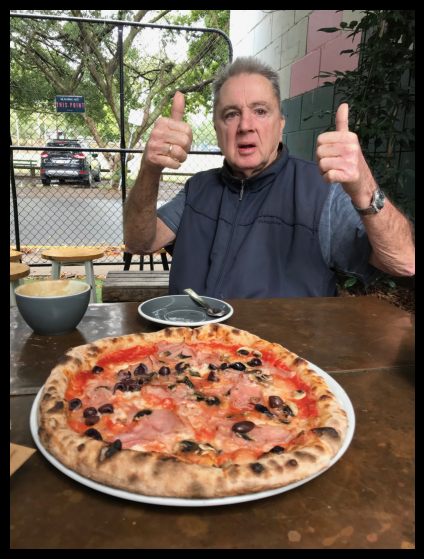

In [63]:
# View the image
plt.figure(figsize=(10, 7))
plt.imshow(img.permute(1, 2, 0)) # matplotlib likes images in HWC (height, width, color_channels) format not CHW (color_channels, height, width)
plt.axis(False);

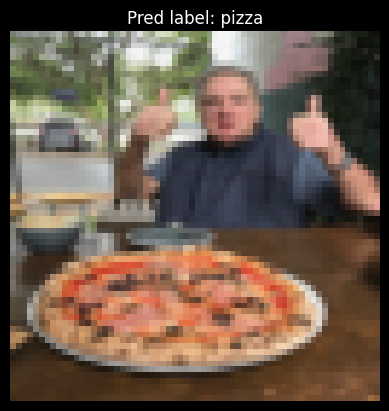

In [64]:
# Make a prediction on the image
model_4.eval()
with torch.inference_mode():
  # Get image pixels into float + between 0 and 1
  img = img / 255.

  # Resize image to 64x64
  resize = transforms.Resize((64, 64))
  img = resize(img)

  # Turn image in single batch and pass to target device
  batch = img.unsqueeze(0).to(device)

  # Predict on image
  y_pred_logit = model_4(batch) 

  # Convert pred logit to pred label
  # pred_label = torch.argmax(torch.softmax(y_pred_logit, dim=1), dim=1)
  pred_label = torch.argmax(y_pred_logit, dim=1) # get same results as above without torch.softmax

# Plot the image and prediction
plt.imshow(img.permute(1, 2, 0))
plt.title(f"Pred label: {class_names[pred_label]}")
plt.axis(False);